In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
sns.set()

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [4]:
df.shape

(2246, 21)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()/len(df)*100

Date           0.000000
Year           0.000000
Experiment     0.000000
DataUse        0.000000
Replication    0.000000
Month          0.000000
Vegetation     0.000000
VegType        0.000000
N2O            0.000000
N_rate         0.000000
PP2            0.000000
PP7            0.000000
AirT           0.000000
DAF_TD         0.000000
DAF_SD         0.000000
WFPS25cm       2.315227
NH4            3.383793
NO3            1.335708
Clay           0.000000
Sand           0.000000
SOM            0.000000
dtype: float64

In [8]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [9]:
df1_num = df.select_dtypes(include=np.number)
df1_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [12]:
impute.fit(df1_num)
trans = impute.transform(df1_num)
df1_trans = pd.DataFrame(data=trans,columns=df1_num.columns)
df1_trans.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012.0,3.896742,170.0,0.00,0.00,-2.0,276.0,241.0,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012.0,2.190218,170.0,0.00,0.00,-2.4,277.0,242.0,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012.0,3.542594,170.0,3.30,8.64,0.3,285.0,250.0,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012.0,3.342870,170.0,0.00,8.13,-3.8,286.0,251.0,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012.0,2.947778,170.0,1.02,8.39,17.6,312.0,277.0,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [14]:
df1_trans.isnull().sum()

Year        0
N2O         0
N_rate      0
PP2         0
PP7         0
AirT        0
DAF_TD      0
DAF_SD      0
WFPS25cm    0
NH4         0
NO3         0
Clay        0
Sand        0
SOM         0
dtype: int64

In [15]:
df1_trans.drop('Year',axis=1,inplace=True)

In [16]:
df1_cat = df.select_dtypes(['object','category'])
df1_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation,VegType
0,BCSE_KBS,Building,R1,February,Corn,Annual
1,BCSE_KBS,Building,R1,February,Corn,Annual
2,BCSE_KBS,Building,R1,February,Corn,Annual
3,BCSE_KBS,Building,R1,February,Corn,Annual
4,BCSE_KBS,Building,R1,March,Corn,Annual


In [17]:
df1_cat.drop(['Month','VegType'],axis=1,inplace=True)
df1_cat.head()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Experiment,DataUse,Replication,Vegetation
0,BCSE_KBS,Building,R1,Corn
1,BCSE_KBS,Building,R1,Corn
2,BCSE_KBS,Building,R1,Corn
3,BCSE_KBS,Building,R1,Corn
4,BCSE_KBS,Building,R1,Corn


In [18]:
df_encode = pd.get_dummies(df1_cat,drop_first=True)
df_encode.head()

,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Vegetation_GLYMX,Vegetation_TRIAE
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [19]:
df_full = pd.concat([df_encode,df1_trans],axis=1)
df_full.head()

,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Vegetation_GLYMX,Vegetation_TRIAE,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,1,0,0,0,0,0,0,0,0,3.896742,170.0,0.00,0.00,-2.0,276.0,241.0,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,1,0,0,0,0,0,0,0,0,2.190218,170.0,0.00,0.00,-2.4,277.0,242.0,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,1,0,0,0,0,0,0,0,0,3.542594,170.0,3.30,8.64,0.3,285.0,250.0,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,1,0,0,0,0,0,0,0,0,3.342870,170.0,0.00,8.13,-3.8,286.0,251.0,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,1,0,0,0,0,0,0,0,0,2.947778,170.0,1.02,8.39,17.6,312.0,277.0,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [21]:
df_num = df_full.loc[:,df1_trans.columns]
df_num.head()

,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,3.896742,170.0,0.00,0.00,-2.0,276.0,241.0,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2.190218,170.0,0.00,0.00,-2.4,277.0,242.0,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,3.542594,170.0,3.30,8.64,0.3,285.0,250.0,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,3.342870,170.0,0.00,8.13,-3.8,286.0,251.0,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2.947778,170.0,1.02,8.39,17.6,312.0,277.0,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [31]:
def boxplot(data,cols):
    q=1
    
    for i in cols:
        plt.figure(figsize=(15,12))
        plt.subplot(5,3,q)
        sns.boxplot(data[i])
        plt.show()
        q+=1

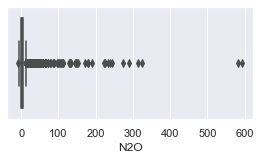

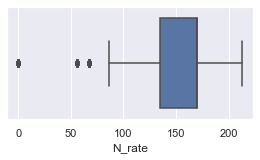

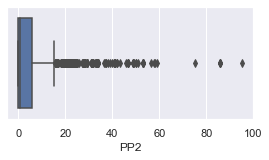

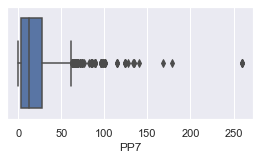

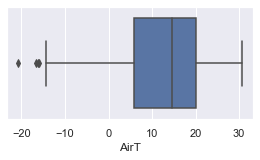

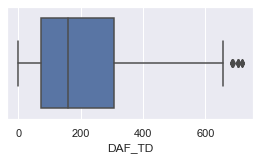

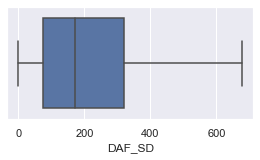

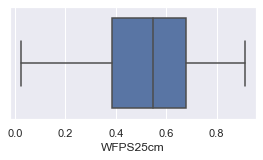

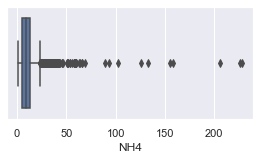

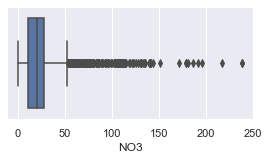

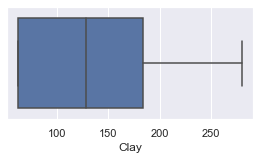

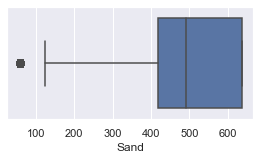

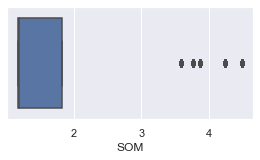

In [32]:
boxplot(df_num,df_num.columns)

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_trans = pd.DataFrame(data=pt.fit_transform(df_num.values),columns=df_num.columns)
df_trans.head()

,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,0.234689,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.802154,0.375458,0.270512,-0.991038,0.851278,-0.816932
1,-0.033784,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.629330,0.370658,0.271470,-0.991038,0.851278,-0.816932
2,0.185967,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.228819,0.348267,0.284778,-0.991038,0.851278,-0.816932
3,0.157135,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.940786,0.350586,0.287301,-0.991038,0.851278,-0.816932
4,0.096829,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.144874,0.265162,0.333564,-0.991038,0.851278,-0.816932


<AxesSubplot:>

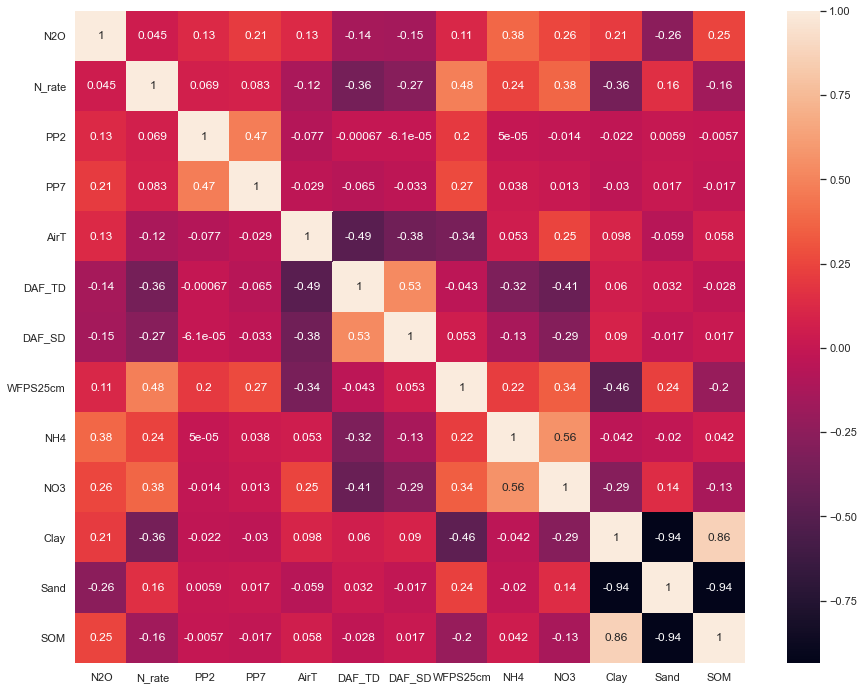

In [83]:
plt.figure(figsize=(15,12))
sns.heatmap(df_trans.corr(),annot=True)

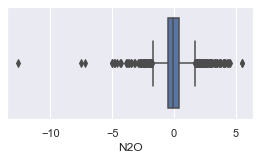

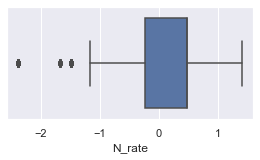

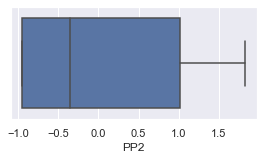

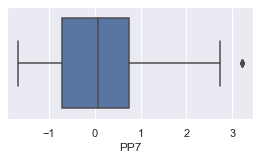

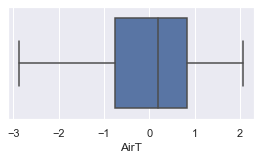

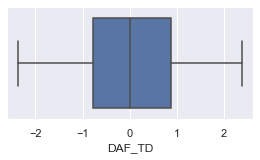

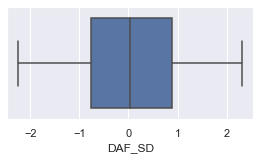

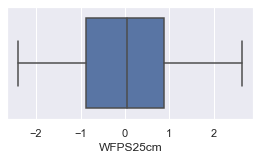

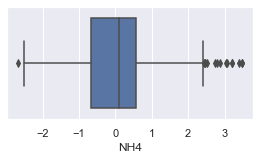

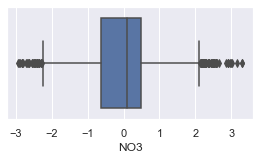

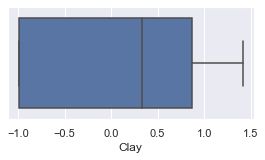

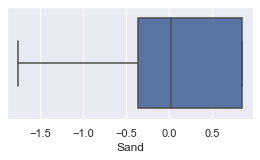

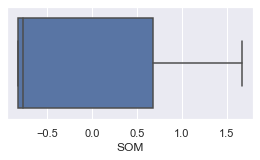

In [44]:
boxplot(df_trans,df_trans.columns)

In [45]:
df_final = pd.concat([df_trans,df_encode],axis=1)
df_final.head()

,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Vegetation_GLYMX,Vegetation_TRIAE
0,0.234689,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.802154,0.375458,0.270512,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
1,-0.033784,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.629330,0.370658,0.271470,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
2,0.185967,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.228819,0.348267,0.284778,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
3,0.157135,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.940786,0.350586,0.287301,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
4,0.096829,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.144874,0.265162,0.333564,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0


In [46]:
X = df_final.drop('N2O',axis=1)
y = df_final['N2O']

In [52]:
X.head()

,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Vegetation_GLYMX,Vegetation_TRIAE
0,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.802154,0.375458,0.270512,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
1,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.629330,0.370658,0.271470,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
2,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.228819,0.348267,0.284778,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
3,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.940786,0.350586,0.287301,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0
4,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.144874,0.265162,0.333564,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0


In [53]:
y.head()

0    0.234689
1   -0.033784
2    0.185967
3    0.157135
4    0.096829
Name: N2O, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print('Train score: ',r2_train)
print('Test score: ',r2_test)

Train score:  0.301752464528973
Test score:  0.2829887180880435


In [62]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print('Train rmse: ',rmse_train)
print('test rmse: ',rmse_test)

Train rmse:  0.8113885853276009
test rmse:  0.9376156552327117


In [99]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [100]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print('Train score: ',r2_train)
print('Test score: ',r2_test)

Train score:  0.300480010221597
Test score:  0.27892529621291395


In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
r2_train_dt = r2_score(y_train,y_train_pred_dt)
r2_test_dt = r2_score(y_test,y_test_pred_dt)
print('train r2: ',r2_train_dt)
print('test r2: ',r2_test_dt)

train r2:  1.0
test r2:  0.33047635655602314


In [69]:
dt.min_samples_split

2

In [65]:
from sklearn.model_selection import GridSearchCV

In [78]:
tune_param = {'max_depth':[15,20,25],'min_samples_split':range(2,10) }
grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=10),param_grid=tune_param,cv=3,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': range(2, 10)},
             scoring='r2')

In [79]:
grid.best_params_

{'max_depth': 25, 'min_samples_split': 9}

In [80]:
dt2 = DecisionTreeRegressor(max_depth=25,min_samples_split=9)
dt2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=25, min_samples_split=9)

In [81]:
y_pred_train_dt2 = dt2.predict(X_train)
y_pred_test_dt2 = dt2.predict(X_test)
r2_train_dt2 = r2_score(y_train,y_pred_train_dt2)
r2_test_dt2 = r2_score(y_test,y_pred_test_dt2)
print('TRain rmse: ',r2_train_dt2)
print('Test rmse: ',r2_test_dt2)

TRain rmse:  0.869531453807451
Test rmse:  0.3082797463262018


In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [85]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_train)
print('Test r2: ',r2_test)

Train r2:  0.6520751859488226
Test r2:  0.4377693752980655


In [95]:
tune_param = {'n_neighbors':range(3,31,2)}
grid = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=tune_param,cv=5,scoring='neg_root_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(3, 31, 2)},
             scoring='neg_root_mean_squared_error')

In [96]:
grid.best_params_

{'n_neighbors': 5}

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [98]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_train)
print('Test r2: ',r2_test)

Train r2:  0.9400963228462742
Test r2:  0.4807359383309724


In [101]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [102]:
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_train)
print('Test r2: ',r2_test)

Train r2:  0.487014763921349
Test r2:  0.4017538311618196


In [104]:
data = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


<AxesSubplot:xlabel='Year', ylabel='N2O'>

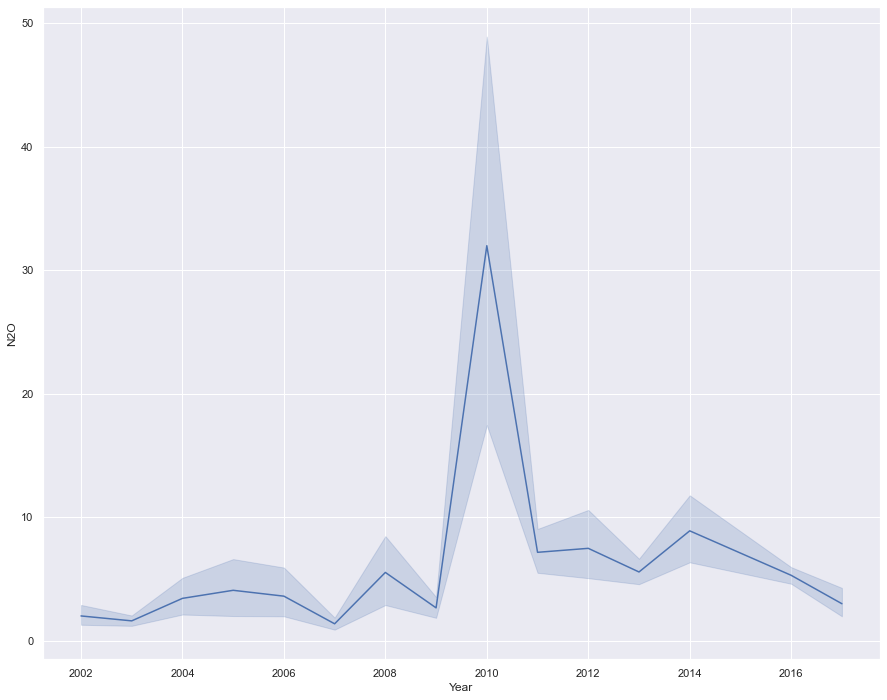

In [107]:
plt.figure(figsize=(15,12))
sns.lineplot(data['Year'],data['N2O'])

In [108]:
data.drop('Date',axis=1,inplace=True)

In [109]:
data.isnull().sum()

Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='WFPS25cm'>

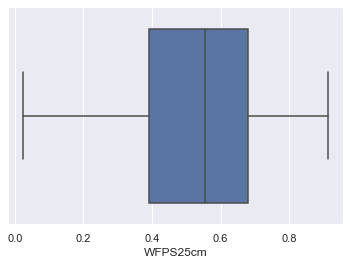

In [110]:
sns.boxplot(data['WFPS25cm'])

In [111]:
from sklearn.impute import SimpleImputer

In [114]:
imputer = SimpleImputer(strategy='mean')
data['WFPS25cm'] = imputer.fit_transform(np.array(data['WFPS25cm']).reshape(-1,1))

In [115]:
data.isnull().sum()

Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm        0
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='NH4'>

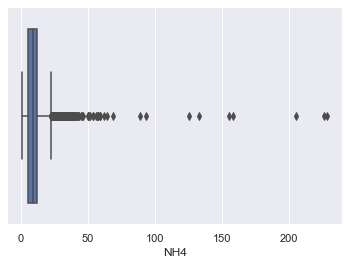

In [116]:
sns.boxplot(data['NH4'])

In [117]:
impute = SimpleImputer(strategy='median')
data['NH4'] = impute.fit_transform(np.array(data['NH4']).reshape(-1,1))

In [118]:
data.isnull().sum()

Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm        0
NH4             0
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='NO3'>

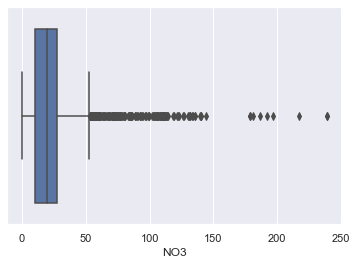

In [119]:
sns.boxplot(data['NO3'])

In [120]:
impute = SimpleImputer(strategy='median')
data['NO3'] = impute.fit_transform(np.array(data['NO3']).reshape(-1,1))

In [121]:
data.isnull().sum()

Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [122]:
data_cat = data.select_dtypes(exclude=np.number)
data_num = data.select_dtypes(include=np.number)

In [123]:
data_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation,VegType
0,BCSE_KBS,Building,R1,February,Corn,Annual
1,BCSE_KBS,Building,R1,February,Corn,Annual
2,BCSE_KBS,Building,R1,February,Corn,Annual
3,BCSE_KBS,Building,R1,February,Corn,Annual
4,BCSE_KBS,Building,R1,March,Corn,Annual


In [125]:
for i in data_cat.columns:
    print(i)
    print(data_cat[i].value_counts())
    print('-'*25)
    print()

Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Testing      670
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64
-------------------------

Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64
-------------------------

VegType
Annual    2246
Name: VegType, dtype: int64
-------------------------



In [126]:
data_cat.drop('VegType',axis=1,inplace=True)

In [127]:
data_encode = pd.get_dummies(data_cat,drop_first=True)
data_encode.head()

,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_GLYMX,Vegetation_TRIAE
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [128]:
data_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


<AxesSubplot:>

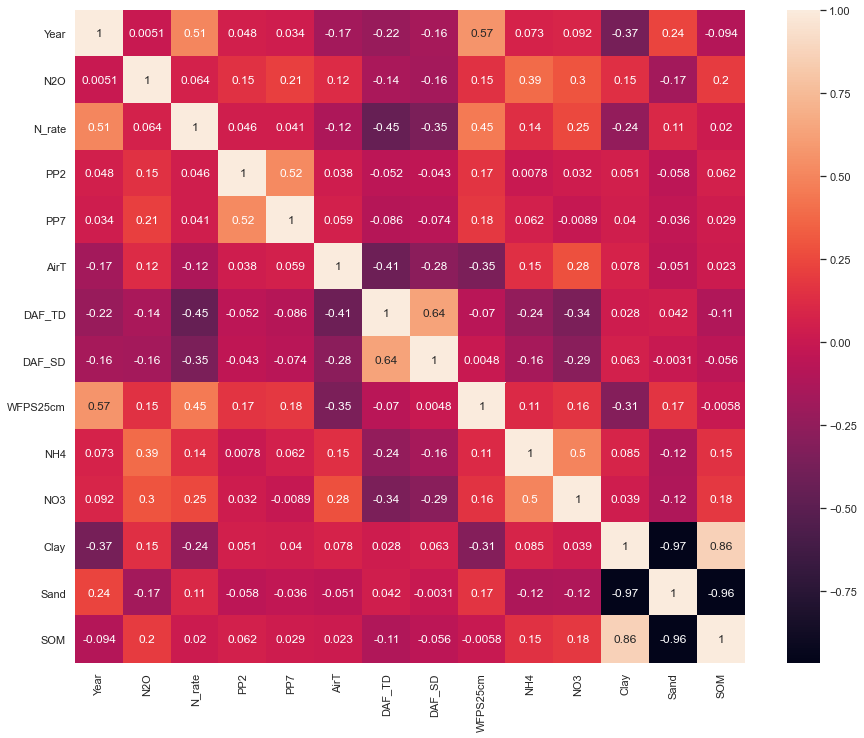

In [132]:
plt.figure(figsize=(15,12))
sns.heatmap(data_num.corr(),annot=True)

In [133]:
data_num.drop('Sand',axis=1,inplace=True)

<AxesSubplot:>

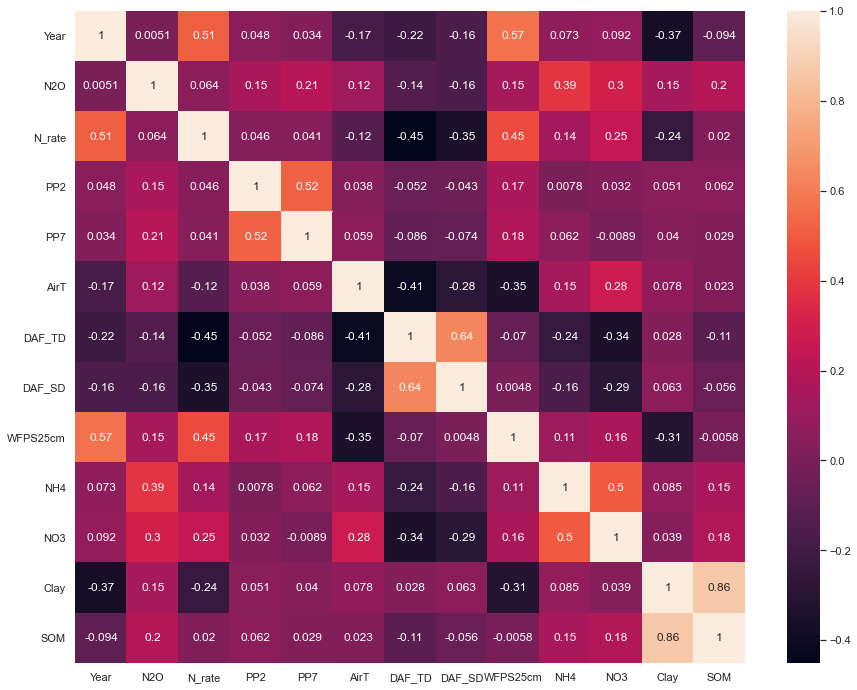

In [134]:
plt.figure(figsize=(15,12))
sns.heatmap(data_num.corr(),annot=True)

In [137]:
data_num.drop(['DAF_TD','DAF_SD'],axis=1,inplace=True)

<AxesSubplot:>

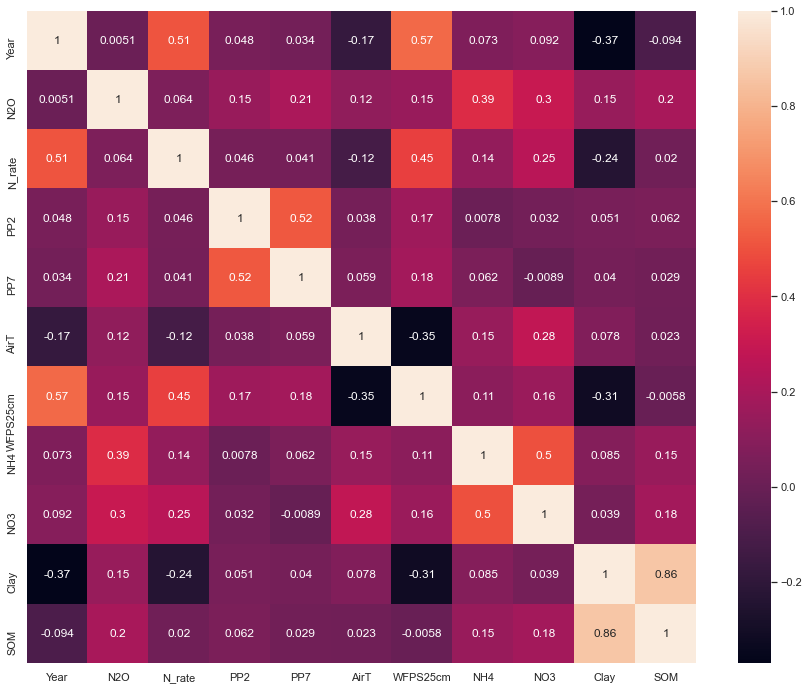

In [138]:
plt.figure(figsize=(15,12))
sns.heatmap(data_num.corr(),annot=True)

In [139]:
data_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,WFPS25cm,NH4,NO3,Clay,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,0.666508,11.046340,22.940812,62.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,0.640608,11.008087,22.959578,62.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,0.728085,10.831669,23.221928,62.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,0.686872,10.849792,23.271978,62.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,0.716221,10.204748,24.206855,62.5,1.174072


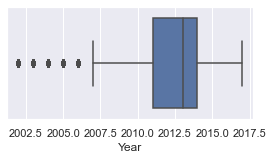

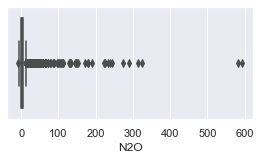

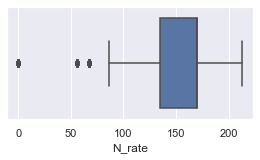

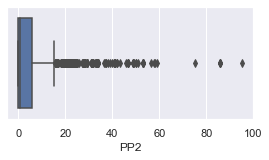

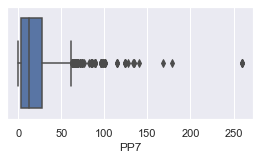

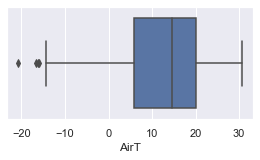

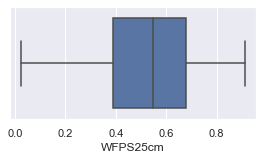

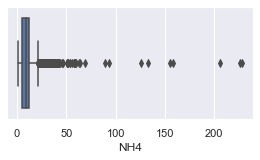

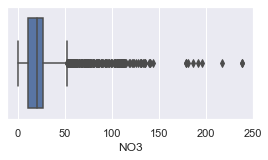

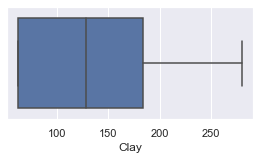

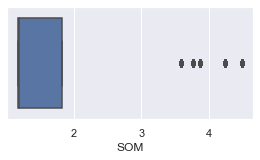

In [140]:
boxplot(data_num,data_num.columns)

In [141]:
data_num.shape

(2246, 11)

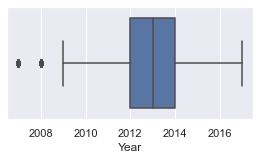

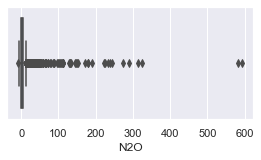

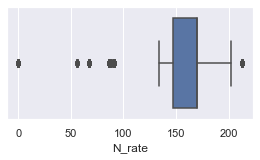

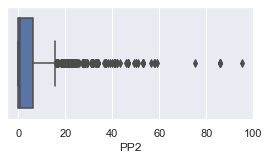

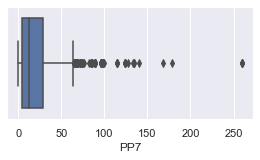

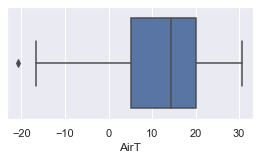

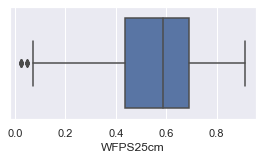

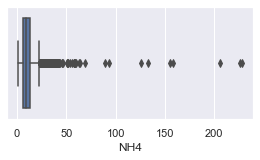

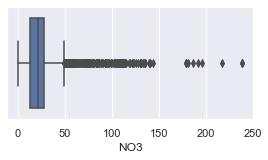

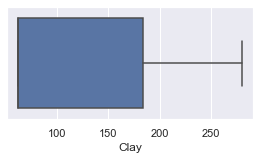

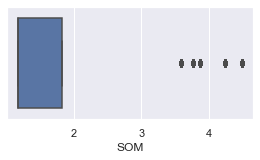

In [149]:
data_cut = data_num[data_num['Year']>2006]
boxplot(data_cut,data_cut.columns)

In [150]:
data_cut.head()

,Year,N2O,N_rate,PP2,PP7,AirT,WFPS25cm,NH4,NO3,Clay,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,0.666508,11.046340,22.940812,62.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,0.640608,11.008087,22.959578,62.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,0.728085,10.831669,23.221928,62.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,0.686872,10.849792,23.271978,62.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,0.716221,10.204748,24.206855,62.5,1.174072


In [151]:
pt = PowerTransformer()
data_trans = pd.DataFrame(data=pt.fit_transform(data_cut.values),columns=data_cut.columns)
data_trans.head()

,Year,N2O,N_rate,PP2,PP7,AirT,WFPS25cm,NH4,NO3,Clay,SOM
0,-0.437518,0.205414,0.371945,-0.956508,-1.699041,-1.438960,0.660464,0.326221,0.203435,-0.887005,-0.763717
1,-0.437518,-0.053178,0.371945,-0.956508,-1.699041,-1.472431,0.464622,0.321299,0.204418,-0.887005,-0.763717
2,-0.437518,0.158452,0.371945,0.674993,-0.207529,-1.238452,1.156767,0.298352,0.218089,-0.887005,-0.763717
3,-0.437518,0.130668,0.371945,-0.956508,-0.250228,-1.587716,0.819749,0.300728,0.220681,-0.887005,-0.763717
4,-0.437518,0.072570,0.371945,-0.017397,-0.228218,0.560676,1.057711,0.213364,0.268232,-0.887005,-0.763717


In [166]:
data_trans.isnull().sum()

Year        0
N2O         0
N_rate      0
PP2         0
PP7         0
AirT        0
WFPS25cm    0
NH4         0
NO3         0
Clay        0
SOM         0
dtype: int64

In [152]:
data_fin = pd.concat([data_trans,data_encode],axis=1)
data_fin.head()

,Year,N2O,N_rate,PP2,PP7,AirT,WFPS25cm,NH4,NO3,Clay,SOM,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_GLYMX,Vegetation_TRIAE
0,-0.437518,0.205414,0.371945,-0.956508,-1.699041,-1.438960,0.660464,0.326221,0.203435,-0.887005,-0.763717,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-0.437518,-0.053178,0.371945,-0.956508,-1.699041,-1.472431,0.464622,0.321299,0.204418,-0.887005,-0.763717,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.437518,0.158452,0.371945,0.674993,-0.207529,-1.238452,1.156767,0.298352,0.218089,-0.887005,-0.763717,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.437518,0.130668,0.371945,-0.956508,-0.250228,-1.587716,0.819749,0.300728,0.220681,-0.887005,-0.763717,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.437518,0.072570,0.371945,-0.017397,-0.228218,0.560676,1.057711,0.213364,0.268232,-0.887005,-0.763717,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [169]:
data_fin.dropna(inplace=True)

In [171]:
data_fin.isnull().sum()

Year                   0
N2O                    0
N_rate                 0
PP2                    0
PP7                    0
AirT                   0
WFPS25cm               0
NH4                    0
NO3                    0
Clay                   0
SOM                    0
Experiment_BCSE_KBS    0
Experiment_MCSE-T2     0
DataUse_Testing        0
Replication_R2         0
Replication_R3         0
Replication_R4         0
Replication_R5         0
Month_August           0
Month_December         0
Month_February         0
Month_January          0
Month_July             0
Month_June             0
Month_March            0
Month_May              0
Month_November         0
Month_October          0
Month_September        0
Vegetation_GLYMX       0
Vegetation_TRIAE       0
dtype: int64

In [172]:
X = data_fin.drop('N2O',axis=1)
y = data_fin['N2O']

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Linear Regression

In [175]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
lr = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.6197289683451767


In [180]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.3628704571138215
Test r2:  0.17203249217033278


## Decision Tree

In [181]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
dt = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.693425532758592


In [183]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  1.0
Test r2:  0.3046612471501827


## SVR

In [184]:
from sklearn.svm import SVR
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
svr = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.4929603943021384


In [185]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.5788411276320805
Test r2:  0.3246823652507256


## KNN

In [186]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
knn = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.5038196128789877


In [187]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.6681679200014714
Test r2:  0.3926210714370091


## Ridge

In [188]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
ridge = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=ridge, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.61964181452499


In [189]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.36243195464602196
Test r2:  0.17255510297350962


## Random Forest

In [190]:
df1 = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df1.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [192]:
df_num = df1.select_dtypes(np.number)
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [193]:
df_cat = df1.select_dtypes(exclude=np.number)
df_cat.head()

,Date,Experiment,DataUse,Replication,Month,Vegetation,VegType
0,2012-02-09,BCSE_KBS,Building,R1,February,Corn,Annual
1,2012-02-10,BCSE_KBS,Building,R1,February,Corn,Annual
2,2012-02-18,BCSE_KBS,Building,R1,February,Corn,Annual
3,2012-02-19,BCSE_KBS,Building,R1,February,Corn,Annual
4,2012-03-16,BCSE_KBS,Building,R1,March,Corn,Annual


In [194]:
df_cat.drop(['Date','VegType'],axis=1,inplace=True)
df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,BCSE_KBS,Building,R1,February,Corn
1,BCSE_KBS,Building,R1,February,Corn
2,BCSE_KBS,Building,R1,February,Corn
3,BCSE_KBS,Building,R1,February,Corn
4,BCSE_KBS,Building,R1,March,Corn


In [195]:
df_enc = pd.get_dummies(df_cat,drop_first=True)
df_enc.head()

,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_GLYMX,Vegetation_TRIAE
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [197]:
df_fin = pd.concat([df_num,df_enc],axis=1)
df_fin.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_GLYMX,Vegetation_TRIAE
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [201]:
df_fin.isnull().sum()

Year                    0
N2O                     0
N_rate                  0
PP2                     0
PP7                     0
AirT                    0
DAF_TD                  0
DAF_SD                  0
WFPS25cm               52
NH4                    76
NO3                    30
Clay                    0
Sand                    0
SOM                     0
Experiment_BCSE_KBS     0
Experiment_MCSE-T2      0
DataUse_Testing         0
Replication_R2          0
Replication_R3          0
Replication_R4          0
Replication_R5          0
Month_August            0
Month_December          0
Month_February          0
Month_January           0
Month_July              0
Month_June              0
Month_March             0
Month_May               0
Month_November          0
Month_October           0
Month_September         0
Vegetation_GLYMX        0
Vegetation_TRIAE        0
dtype: int64

In [208]:
imputer = SimpleImputer(strategy='mean')
df_fin['WFPS25cm'] = imputer.fit_transform(np.array(data['WFPS25cm']).reshape(-1,1))

In [209]:
imputer = SimpleImputer(strategy='mean')
df_fin['NH4'] = imputer.fit_transform(np.array(data['NH4']).reshape(-1,1))

In [210]:
imputer = SimpleImputer(strategy='mean')
df_fin['NO3'] = imputer.fit_transform(np.array(data['NO3']).reshape(-1,1))

In [211]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [212]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [213]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
rf = RandomForestRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-618.4824910139336


In [214]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.879550170862308
Test r2:  0.6957324977711247


In [215]:
pt = PowerTransformer()
df_num = pd.DataFrame(data=pt.fit_transform(df_num),columns=df_num.columns)
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,-0.020287,0.234689,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.777430,0.402276,0.277726,-0.991038,0.851278,-0.816932
1,-0.020287,-0.033784,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.601559,0.397425,0.278688,-0.991038,0.851278,-0.816932
2,-0.020287,0.185967,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.213805,0.374802,0.292057,-0.991038,0.851278,-0.816932
3,-0.020287,0.157135,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.918883,0.377146,0.294592,-0.991038,0.851278,-0.816932
4,-0.020287,0.096829,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.127712,0.290844,0.341071,-0.991038,0.851278,-0.816932


In [216]:
df_fin = pd.concat([df_num,df_enc],axis=1)
df_fin.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Experiment_BCSE_KBS,Experiment_MCSE-T2,DataUse_Testing,Replication_R2,Replication_R3,Replication_R4,Replication_R5,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Vegetation_GLYMX,Vegetation_TRIAE
0,-0.020287,0.234689,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.777430,0.402276,0.277726,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-0.020287,-0.033784,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.601559,0.397425,0.278688,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.020287,0.185967,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.213805,0.374802,0.292057,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.020287,0.157135,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.918883,0.377146,0.294592,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.020287,0.096829,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.127712,0.290844,0.341071,-0.991038,0.851278,-0.816932,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [217]:
df_fin.isnull().sum()

Year                    0
N2O                     0
N_rate                  0
PP2                     0
PP7                     0
AirT                    0
DAF_TD                  0
DAF_SD                  0
WFPS25cm               52
NH4                    76
NO3                    30
Clay                    0
Sand                    0
SOM                     0
Experiment_BCSE_KBS     0
Experiment_MCSE-T2      0
DataUse_Testing         0
Replication_R2          0
Replication_R3          0
Replication_R4          0
Replication_R5          0
Month_August            0
Month_December          0
Month_February          0
Month_January           0
Month_July              0
Month_June              0
Month_March             0
Month_May               0
Month_November          0
Month_October           0
Month_September         0
Vegetation_GLYMX        0
Vegetation_TRIAE        0
dtype: int64

In [218]:
imputer = SimpleImputer(strategy='mean')
df_fin['WFPS25cm'] = imputer.fit_transform(np.array(data['WFPS25cm']).reshape(-1,1))

In [219]:
imputer = SimpleImputer(strategy='mean')
df_fin['NH4'] = imputer.fit_transform(np.array(data['NH4']).reshape(-1,1))

In [220]:
imputer = SimpleImputer(strategy='mean')
df_fin['NO3'] = imputer.fit_transform(np.array(data['NO3']).reshape(-1,1))

In [221]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [224]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
rf = RandomForestRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.37410870885714687


In [225]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.9446238042822546
Test r2:  0.5473036811901328


In [226]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
knn = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.5962186097305376


In [228]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.5955649486962663
Test r2:  0.3534514352162794


## XGB

In [229]:
from xgboost import XGBRegressor
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
xgb = XGBRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.4030392135568916


In [230]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.9878951002059307
Test r2:  0.4679617365000013


In [231]:
df = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [232]:
df.drop(['Date','VegType'],axis=1,inplace=True)

In [233]:
df_num = df.select_dtypes(np.number)
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [234]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,BCSE_KBS,Building,R1,February,Corn
1,BCSE_KBS,Building,R1,February,Corn
2,BCSE_KBS,Building,R1,February,Corn
3,BCSE_KBS,Building,R1,February,Corn
4,BCSE_KBS,Building,R1,March,Corn


In [235]:
for i in df_cat.columns:
    print(i)
    print(df_cat[i].value_counts())
    print('-'*25)
    print()

Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Testing      670
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64
-------------------------

Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64
-------------------------



In [236]:
replication = {'R1':1,'R2':2,'R3':3,'R4':4,'R5':5 }
df_cat['Replication'] = df_cat['Replication'].apply(lambda x:replication[x])
df_cat['Replication'].value_counts()

1    1350
2     268
3     266
4     265
5      97
Name: Replication, dtype: int64

In [238]:
month_name = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_num = [1,2,3,4,5,6,7,8,9,10,11,12]
month_dic = dict(zip(month_name,month_num))
df_cat['Month'] = df_cat['Month'].apply(lambda x:month_dic[x])
df_cat['Month'].value_counts()

7     285
6     271
9     252
5     239
8     222
4     222
10    175
11    169
3     146
1      96
12     89
2      80
Name: Month, dtype: int64

In [239]:
df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,BCSE_KBS,Building,1,2,Corn
1,BCSE_KBS,Building,1,2,Corn
2,BCSE_KBS,Building,1,2,Corn
3,BCSE_KBS,Building,1,2,Corn
4,BCSE_KBS,Building,1,3,Corn


In [240]:
df_cat.drop('Experiment',axis=1,inplace=True)

In [241]:
df_cat1 = df_cat.select_dtypes(exclude=np.number)
df_cat1.head()

,DataUse,Vegetation
0,Building,Corn
1,Building,Corn
2,Building,Corn
3,Building,Corn
4,Building,Corn


In [242]:
df_num1 = df_cat.select_dtypes(np.number)
df_num1.head()

,Replication,Month
0,1,2
1,1,2
2,1,2
3,1,2
4,1,3


In [243]:
df_encode = pd.get_dummies(df_cat1)
df_encode.head()

,DataUse_Building,DataUse_Testing,Vegetation_Corn,Vegetation_GLYMX,Vegetation_TRIAE
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


In [244]:
df_fin = pd.concat([df_encode,df_num1,df_num],axis=1)
df_fin.head()

,DataUse_Building,DataUse_Testing,Vegetation_Corn,Vegetation_GLYMX,Vegetation_TRIAE,Replication,Month,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,1,0,1,0,0,1,2,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,1,0,1,0,0,1,2,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,1,0,1,0,0,1,2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,1,0,1,0,0,1,2,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,1,0,1,0,0,1,3,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [245]:
df_fin.isnull().sum()

DataUse_Building     0
DataUse_Testing      0
Vegetation_Corn      0
Vegetation_GLYMX     0
Vegetation_TRIAE     0
Replication          0
Month                0
Year                 0
N2O                  0
N_rate               0
PP2                  0
PP7                  0
AirT                 0
DAF_TD               0
DAF_SD               0
WFPS25cm            52
NH4                 76
NO3                 30
Clay                 0
Sand                 0
SOM                  0
dtype: int64

In [246]:
df_fin['WFPS25cm'].fillna(df_fin['WFPS25cm'].mean(),inplace=True)
df_fin['NH4'].fillna(df_fin['NH4'].mean(),inplace=True)
df_fin['NO3'].fillna(df_fin['NO3'].mean(),inplace=True)

In [248]:
df_fin.isnull().sum()

DataUse_Building    0
DataUse_Testing     0
Vegetation_Corn     0
Vegetation_GLYMX    0
Vegetation_TRIAE    0
Replication         0
Month               0
Year                0
N2O                 0
N_rate              0
PP2                 0
PP7                 0
AirT                0
DAF_TD              0
DAF_SD              0
WFPS25cm            0
NH4                 0
NO3                 0
Clay                0
Sand                0
SOM                 0
dtype: int64

In [249]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [250]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [251]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [252]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('R2 train: ',r2_train)
print('R2 test: ',r2_test)

R2 train:  0.9983765112377235
R2 test:  0.6866147753132652


In [253]:
tune_param = {'max_depth':range(2,7),'n_estimators':[80,100,120,140] }
grid = GridSearchCV(estimator=XGBRegressor(),param_grid=tune_param,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [254]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 80}

In [255]:
xgb = XGBRegressor(max_depth=3,n_estimators=80)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [256]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('R2 train: ',r2_train)
print('R2 test: ',r2_test)

R2 train:  0.9507722369983524
R2 test:  0.5721054524962017


## Retrying....

In [3]:
df=pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')

In [4]:
df.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [5]:
df.drop(['Date','VegType'],axis=1,inplace=True)

In [6]:
df.head()

,Year,Experiment,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,BCSE_KBS,Building,R1,February,Corn,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,BCSE_KBS,Building,R1,February,Corn,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,BCSE_KBS,Building,R1,February,Corn,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,BCSE_KBS,Building,R1,February,Corn,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,BCSE_KBS,Building,R1,March,Corn,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


<AxesSubplot:xlabel='Experiment', ylabel='N2O'>

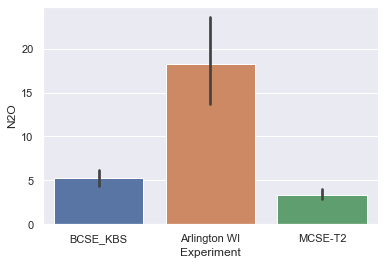

In [7]:
sns.barplot(df['Experiment'],df['N2O'])

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.54E+02'}, xlabel='NH4', ylabel='N2O'>,
         <AxesSubplot:title={'center':'F=1.44E+02'}, xlabel='NO3'>,
         <AxesSubplot:title={'center':'F=9.14E+01'}, xlabel='PP7'>,
         <AxesSubplot:title={'center':'F=7.93E+01'}, xlabel='PP2'>],
        [<AxesSubplot:title={'center':'F=7.70E+01'}, xlabel='SOM', ylabel='N2O'>,
         <AxesSubplot:title={'center':'F=7.23E+01'}, xlabel='DAF_SD'>,
         <AxesSubplot:title={'center':'F=5.81E+01'}, xlabel='Sand'>,
         <AxesSubplot:title={'center':'F=5.08E+01'}, xlabel='AirT'>],
        [<AxesSubplot:title={'center':'F=4.74E+01'}, xlabel='DAF_TD', ylabel='N2O'>,
         <AxesSubplot:title={'center':'F=3.56E+01'}, xlabel='Clay'>,
         <AxesSubplot:title={'center':'F=3.52E+01'}, xlabel='WFPS25cm'>,
         <AxesSubplot:title={'center':'F=5.06E+00'}, xlabel='Year'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=1.48E-01'}, xlabel='N2O', ylabel='Experiment'>,
         <Ax

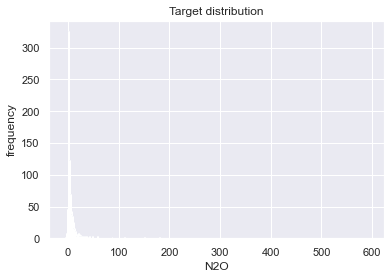

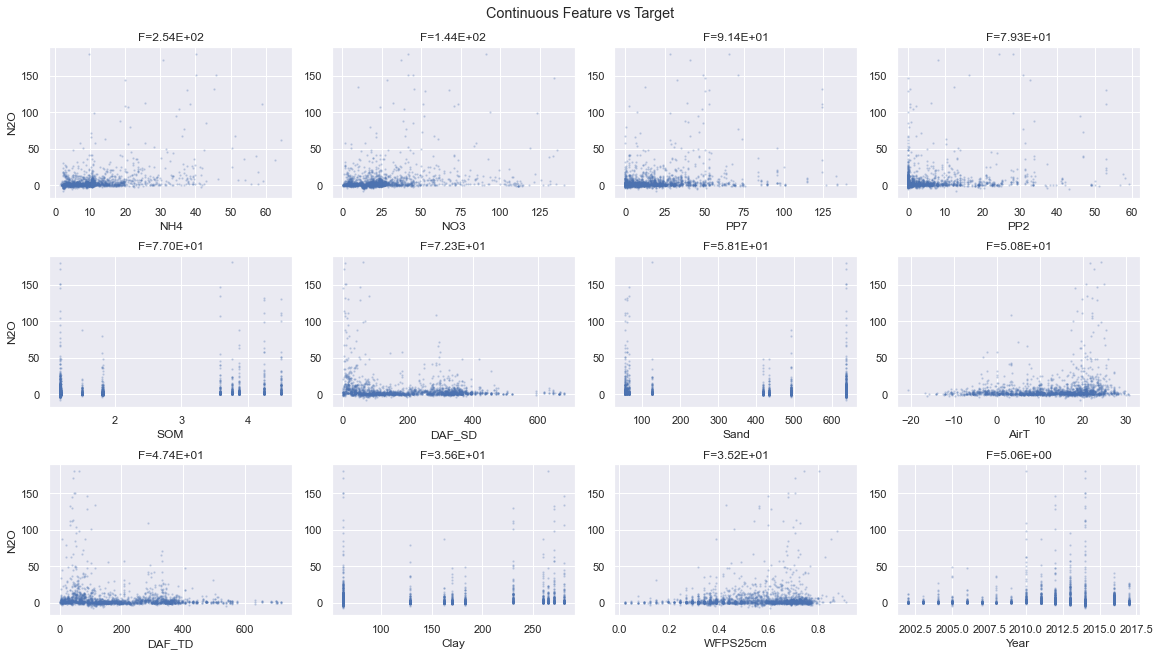

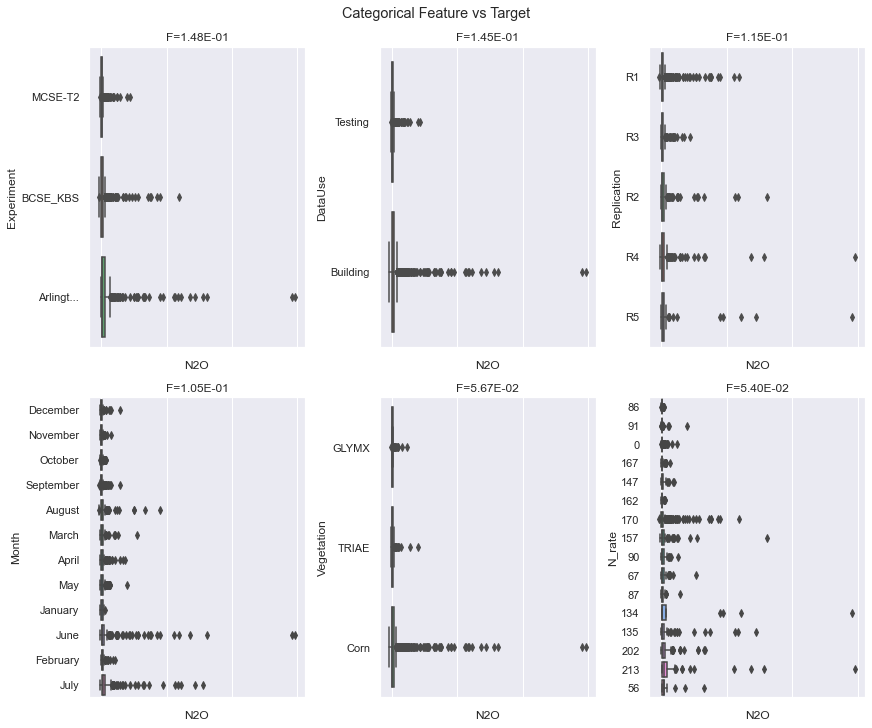

In [8]:
import dabl
dabl.plot(df,'N2O')

In [9]:
df_cat = df.select_dtypes(exclude=np.number)
df_num = df.select_dtypes(np.number)

In [10]:
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [11]:
df_num.isnull().sum()

Year         0
N2O          0
N_rate       0
PP2          0
PP7          0
AirT         0
DAF_TD       0
DAF_SD       0
WFPS25cm    52
NH4         76
NO3         30
Clay         0
Sand         0
SOM          0
dtype: int64

In [12]:
df_num['WFPS25cm'] = df_num['WFPS25cm'].fillna(df_num['WFPS25cm'].mean())
df_num['NH4'] = df_num['NH4'].fillna(df_num['NH4'].mean())
df_num['NO3'] = df_num['NO3'].fillna(df_num['NO3'].mean())

<AxesSubplot:>

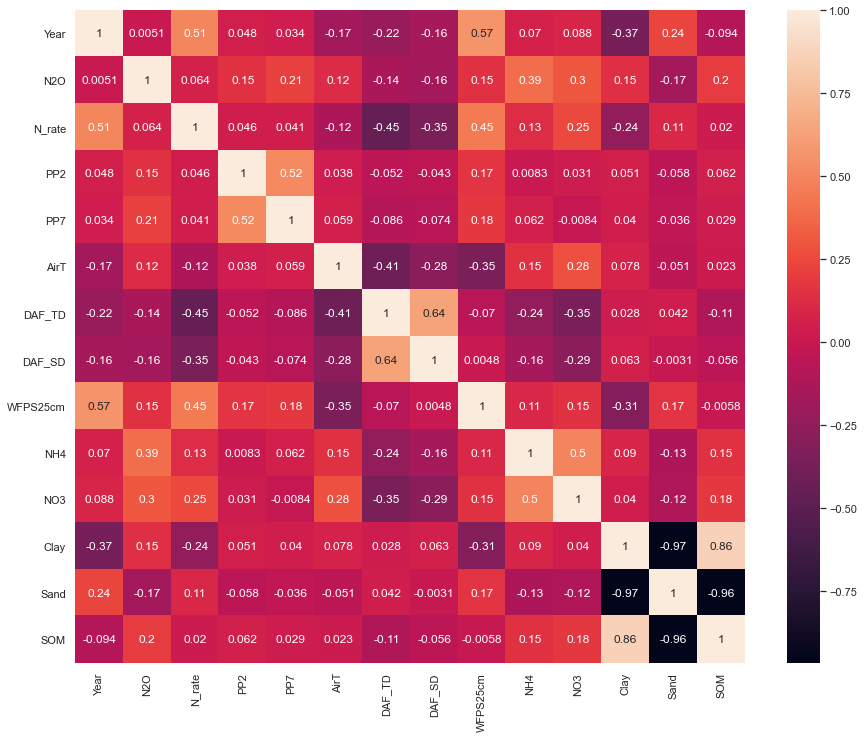

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(),annot=True)

In [14]:
df_num.drop('Sand',axis=1,inplace=True)
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,1.174072


<AxesSubplot:>

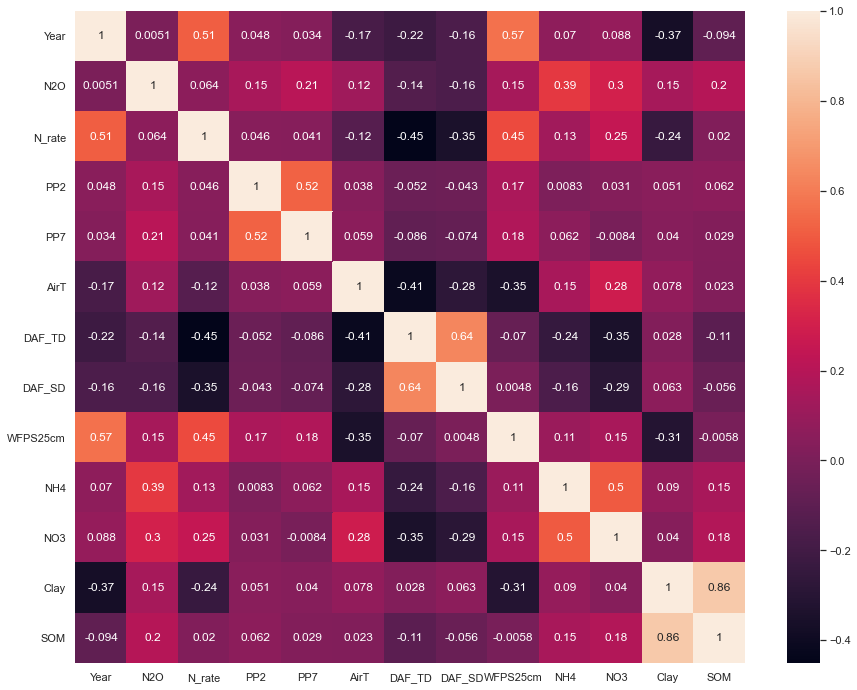

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(),annot=True)

In [16]:
df_num.drop('SOM',axis=1,inplace=True)
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5


<AxesSubplot:>

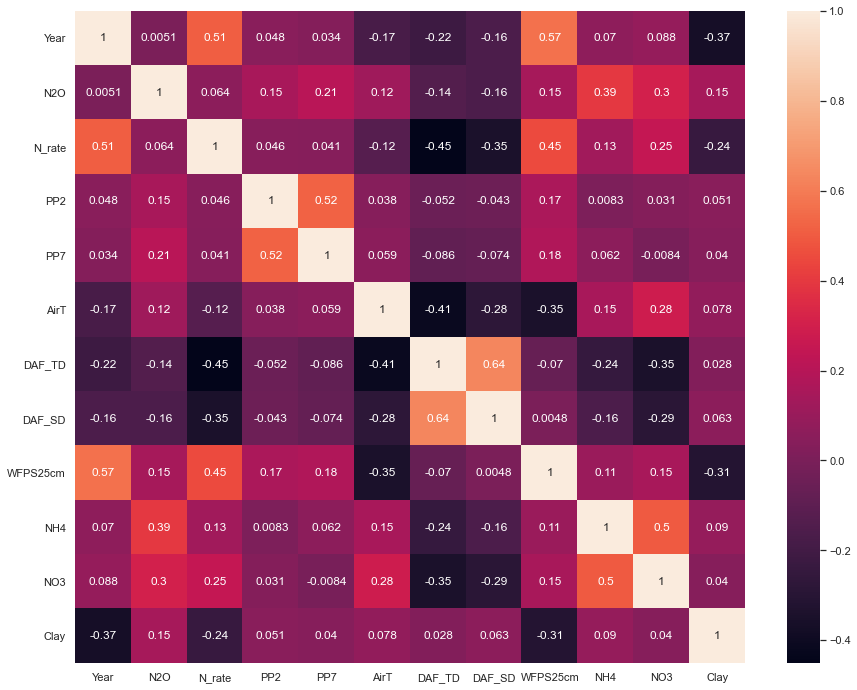

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(),annot=True)

In [18]:
df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,BCSE_KBS,Building,R1,February,Corn
1,BCSE_KBS,Building,R1,February,Corn
2,BCSE_KBS,Building,R1,February,Corn
3,BCSE_KBS,Building,R1,February,Corn
4,BCSE_KBS,Building,R1,March,Corn


In [19]:
df_cat.shape

(2246, 5)

In [20]:
df_cat['Experiment'].value_counts()

BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64

In [23]:
df_cat = df_cat[df_cat['Experiment']!='MCSE-T2']
df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,BCSE_KBS,Building,R1,February,Corn
1,BCSE_KBS,Building,R1,February,Corn
2,BCSE_KBS,Building,R1,February,Corn
3,BCSE_KBS,Building,R1,February,Corn
4,BCSE_KBS,Building,R1,March,Corn


In [24]:
df1 = pd.concat([df_cat,df_num],axis=1)
df1.head()

,Experiment,DataUse,Replication,Month,Vegetation,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay
0,BCSE_KBS,Building,R1,February,Corn,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5
1,BCSE_KBS,Building,R1,February,Corn,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5
2,BCSE_KBS,Building,R1,February,Corn,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5
3,BCSE_KBS,Building,R1,February,Corn,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5
4,BCSE_KBS,Building,R1,March,Corn,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5


In [25]:
df1.isnull().sum()

Experiment     670
DataUse        670
Replication    670
Month          670
Vegetation     670
Year             0
N2O              0
N_rate           0
PP2              0
PP7              0
AirT             0
DAF_TD           0
DAF_SD           0
WFPS25cm         0
NH4              0
NO3              0
Clay             0
dtype: int64

In [26]:
df1.shape

(2246, 17)

In [27]:
df1.dropna(axis=0,inplace=True)
df1.shape

(1576, 17)

In [28]:
df1.isnull().sum()

Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
Year           0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
dtype: int64

In [29]:
df1_cat = df1.select_dtypes(exclude=np.number)
df1_num = df1.select_dtypes(np.number)

In [30]:
df1_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,BCSE_KBS,Building,R1,February,Corn
1,BCSE_KBS,Building,R1,February,Corn
2,BCSE_KBS,Building,R1,February,Corn
3,BCSE_KBS,Building,R1,February,Corn
4,BCSE_KBS,Building,R1,March,Corn


In [31]:
def unique_val(data):
    for i in data.columns:
        print(i)
        print(data[i].value_counts())
        print('-'*25)
        print()

In [32]:
unique_val(df1_cat)

Experiment
BCSE_KBS        1094
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1181
R4     100
R3      99
R2      99
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         190
June         180
September    167
August       158
May          151
October      133
April        123
November     118
March        114
January       89
December      85
February      68
Name: Month, dtype: int64
-------------------------

Vegetation
Corn    1576
Name: Vegetation, dtype: int64
-------------------------



In [37]:
df1_cat.drop(['Vegetation','DataUse'],axis=1,inplace=True)
experiment = {'BCSE_KBS':1,'Arlington WI':2}
df1_cat['Experiment'] = df1_cat['Experiment'].apply(lambda x:experiment[x])
df1_cat['Replication'] = df1_cat['Replication'].apply(lambda x:x[1])
month = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,
         'November':11,'December':12}
df1_cat['Month'] = df1_cat['Month'].apply(lambda x:month[x])
df1_cat.head()

,Experiment,Replication,Month
0,1,1,2
1,1,1,2
2,1,1,2
3,1,1,2
4,1,1,3


In [39]:
df1_num.std()

Year          1.906771
N2O          33.507667
N_rate       30.154416
PP2          10.021091
PP7          20.949187
AirT         10.065309
DAF_TD      109.839777
DAF_SD      115.486063
WFPS25cm      0.123423
NH4          14.559350
NO3          26.823148
Clay         91.745541
dtype: float64

In [40]:
df1_new = pd.concat([df1_cat,df1_num],axis=1)
df1_new.head()

,Experiment,Replication,Month,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay
0,1,1,2,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5
1,1,1,2,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5
2,1,1,2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5
3,1,1,2,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5
4,1,1,3,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5


In [41]:
df1_new.isnull().sum()

Experiment     0
Replication    0
Month          0
Year           0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
dtype: int64

In [47]:
df1_new.dtypes

Experiment       int64
Replication     object
Month            int64
Year             int64
N2O            float64
N_rate           int64
PP2            float64
PP7            float64
AirT           float64
DAF_TD           int64
DAF_SD           int64
WFPS25cm       float64
NH4            float64
NO3            float64
Clay           float64
dtype: object

In [48]:
df1_new['Replication'] = df1_new['Replication'].astype('int')
df1_new.dtypes

Experiment       int64
Replication      int64
Month            int64
Year             int64
N2O            float64
N_rate           int64
PP2            float64
PP7            float64
AirT           float64
DAF_TD           int64
DAF_SD           int64
WFPS25cm       float64
NH4            float64
NO3            float64
Clay           float64
dtype: object

In [49]:
X = df1_new.drop('N2O',axis=1)
y = df1_new['N2O']

In [50]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
from xgboost import XGBRegressor

In [57]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
from sklearn.metrics import r2_score
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.9993927488519505
r2_test:  0.32180858372799936


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [60]:
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.9014777164433734
r2_test:  0.20224879901897141


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [62]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.930846520408322
r2_test:  0.35189776856193433


In [66]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [67]:
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.2698915821799638
r2_test:  -0.007163912674405415


In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  1.0
r2_test:  -0.10435854632609054


## Gradient boost

In [72]:
gb = GradientBoostingRegressor(random_state=10)
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=10)

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.930846520408322
r2_test:  0.35139414815636416
RMSE:  33.33663958420406


In [75]:
gb.max_depth

3

In [138]:
from sklearn.model_selection import GridSearchCV
tune_param = {'max_depth':[2,3,4,5,6], 'learning_rate':[0.08,0.09,0.1,0.2,0.3]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=tune_param,cv=3,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.08, 0.09, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error')

In [139]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

In [152]:
gb1 = GradientBoostingRegressor(random_state=10,learning_rate=0.1,max_depth=2)
gb1.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, random_state=10)

In [153]:
y_pred_train = gb1.predict(X_train)
y_pred_test = gb1.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.8356163773620651
r2_test:  0.3900000557297908
RMSE:  32.32929886827629


In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [163]:
kfold = KFold(n_splits=10)
gb = GradientBoostingRegressor(random_state=10,learning_rate=0.1,max_depth=2)
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-897.3921625008227


In [164]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9993927488519505
r2_test:  0.32180858372799936
RMSE:  34.08847185510885


In [167]:
tune_param = {'learning_rate':[0.1,0.2,0.3,0.4,0.5], 'reg_lambda':[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2], 'n_estimators':[80,100,120,140]}
grid = GridSearchCV(estimator=XGBRegressor(),param_grid=tune_param,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [168]:
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 140, 'reg_lambda': 1.2}

In [169]:
xgb = XGBRegressor(learning_rate=0.5,n_estimators=140,reg_lambda=1.2)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.2, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9999884319419265
r2_test:  0.3146070795626714
RMSE:  34.26898137830171


In [171]:
kfold = KFold(n_splits=10)
xgb = XGBRegressor(learning_rate=0.5,n_estimators=140,reg_lambda=1.2)
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-804.6965502250479


In [172]:
df1_new.shape

(1576, 15)

In [191]:
df1 = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df1.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [192]:
df1.isnull().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='WFPS25cm', ylabel='Density'>

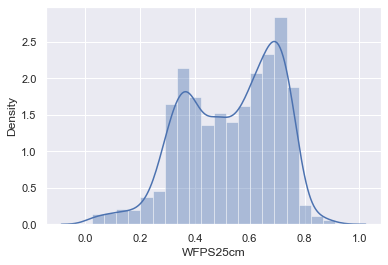

In [193]:
sns.distplot(df1['WFPS25cm'])

In [196]:
df1['WFPS25cm'] = df1['WFPS25cm'].fillna(df1['WFPS25cm'].mean())

<AxesSubplot:xlabel='NH4', ylabel='Density'>

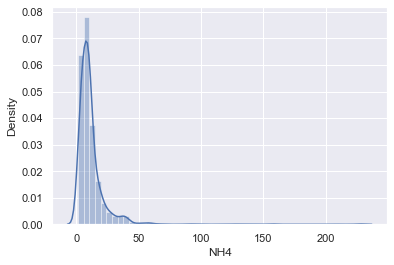

In [194]:
sns.distplot(df1['NH4'])

In [197]:
df1['NH4'] = df1['NH4'].fillna(df1['NH4'].median())

<AxesSubplot:xlabel='NO3', ylabel='Density'>

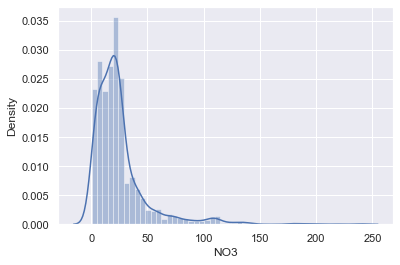

In [195]:
sns.distplot(df1['NO3'])

In [198]:
df1['NO3'] = df1['NO3'].fillna(df1['NO3'].median())

In [199]:
df1.isnull().sum()

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [200]:
df1.drop('Date',axis=1,inplace=True)

In [201]:
df1.head(2)

,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.0,0.0,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.0,0.0,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072


In [288]:
df1.head(2)

,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.0,0.0,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.0,0.0,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072


In [213]:
df_cat = df1.select_dtypes(exclude=np.number)
df_num = df1.select_dtypes(np.number)

In [214]:
df_cat.head(2)

,Experiment,DataUse,Replication,Month,Vegetation,VegType
0,BCSE_KBS,Building,R1,February,Corn,Annual
1,BCSE_KBS,Building,R1,February,Corn,Annual


In [215]:
df_num.head(2)

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.0,0.0,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.0,0.0,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072


In [216]:
unique_val(df_cat)

Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Testing      670
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64
-------------------------

Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64
-------------------------

VegType
Annual    2246
Name: VegType, dtype: int64
-------------------------



In [217]:
df_cat.drop('VegType',axis=1,inplace=True)

In [218]:
experiment = {'BCSE_KBS':1,'MCSE-T2':2,'Arlington WI':3}
df_cat['Experiment'] = df_cat['Experiment'].apply(lambda x:experiment[x])

datause = {'Building':1,'Testing':2}
df_cat['DataUse'] = df_cat['DataUse'].apply(lambda x:datause[x])

df_cat['Replication'] = df_cat['Replication'].apply(lambda x:x[1])
df_cat['Replication'] = df_cat['Replication'].astype('int')

month = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
         'October':10,'November':11,'December':12}
df_cat['Month'] = df_cat['Month'].apply(lambda x:month[x])

vegetation = {'Corn':1,'GLYMX':2,'TRIAE':3}
df_cat['Vegetation'] = df_cat['Vegetation'].apply(lambda x:vegetation[x])

df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation
0,1,1,1,2,1
1,1,1,1,2,1
2,1,1,1,2,1
3,1,1,1,2,1
4,1,1,1,3,1


In [219]:
df_fin = pd.concat([df_cat,df_num],axis=1)
df_fin.head()

,Experiment,DataUse,Replication,Month,Vegetation,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,1,1,1,2,1,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,1,1,1,2,1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,1,1,1,2,1,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,1,1,1,2,1,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,1,1,1,3,1,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [242]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [243]:
X.head()

,Experiment,DataUse,Replication,Month,Vegetation,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,1,1,1,2,1,2012,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,1,1,1,2,1,2012,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,1,1,1,2,1,2012,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,1,1,1,2,1,2012,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,1,1,1,3,1,2012,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [247]:
df_num.head()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [289]:
df_cat = df1.select_dtypes(exclude=np.number)
df_cat.head()

,Experiment,DataUse,Replication,Month,Vegetation,VegType
0,BCSE_KBS,Building,R1,February,Corn,Annual
1,BCSE_KBS,Building,R1,February,Corn,Annual
2,BCSE_KBS,Building,R1,February,Corn,Annual
3,BCSE_KBS,Building,R1,February,Corn,Annual
4,BCSE_KBS,Building,R1,March,Corn,Annual


In [290]:
df_cat.drop('VegType',axis=1,inplace=True)
df_cat.isnull().sum().sum()

0

In [291]:
df_num = df1.select_dtypes(np.number)
df_num.head(2)

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.0,0.0,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.0,0.0,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072


In [292]:
df_num.drop('N2O',axis=1,inplace=True)

In [293]:
df_num.head(2)

,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,170,0.0,0.0,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,170,0.0,0.0,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072


In [294]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_trans = pd.DataFrame(data=pt.fit_transform(df_num.values),columns=df_num.columns)
df_trans.head()

,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,-0.020287,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.788669,0.403899,0.277479,-0.991038,0.851278,-0.816932
1,-0.020287,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.610707,0.398962,0.278448,-0.991038,0.851278,-0.816932
2,-0.020287,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.230261,0.375936,0.291912,-0.991038,0.851278,-0.816932
3,-0.020287,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.931808,0.378322,0.294465,-0.991038,0.851278,-0.816932
4,-0.020287,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.143135,0.290494,0.341278,-0.991038,0.851278,-0.816932


In [295]:
df_fin = pd.concat([df_cat,df_trans],axis=1)
df_fin.head()

,Experiment,DataUse,Replication,Month,Vegetation,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,BCSE_KBS,Building,R1,February,Corn,-0.020287,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.788669,0.403899,0.277479,-0.991038,0.851278,-0.816932
1,BCSE_KBS,Building,R1,February,Corn,-0.020287,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.610707,0.398962,0.278448,-0.991038,0.851278,-0.816932
2,BCSE_KBS,Building,R1,February,Corn,-0.020287,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.230261,0.375936,0.291912,-0.991038,0.851278,-0.816932
3,BCSE_KBS,Building,R1,February,Corn,-0.020287,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.931808,0.378322,0.294465,-0.991038,0.851278,-0.816932
4,BCSE_KBS,Building,R1,March,Corn,-0.020287,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.143135,0.290494,0.341278,-0.991038,0.851278,-0.816932


In [296]:
df_fin.to_csv('traineddata.csv')

In [251]:
X = df_fin.copy()
y.head()

0    3.896742
1    2.190218
2    3.542594
3    3.342870
4    2.947778
Name: N2O, dtype: float64

In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [253]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9984087947648602
r2_test:  0.36219839116817665
RMSE:  34.560488441573945


In [255]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [256]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.5907035412265802
r2_test:  0.4224767299854465
RMSE:  32.886814634471236


In [257]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [258]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.21339399721385754
r2_test:  0.15352476132693926
RMSE:  39.814768580562


In [259]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [260]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  1.0
r2_test:  0.30446713301944284
RMSE:  36.09074899225307


In [261]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [262]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9322536040651639
r2_test:  0.3453685057523911
RMSE:  35.01349907603348


In [263]:
ada =AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [264]:
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.09278121627630576
r2_test:  0.32747592659380476
RMSE:  35.48877297803232


In [265]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [266]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9061146370428388
r2_test:  0.46689122671832683
RMSE:  31.596936789715215


In [267]:
kfold = KFold(n_splits=10)
gb = GradientBoostingRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-252.5584293469846


In [268]:
tune_param = {'learning_rate':[0.08,0.09,0.1,0.12,0.2], 'max_depth':range(2,10)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=tune_param,cv=4,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.08, 0.09, 0.1, 0.12, 0.2],
                         'max_depth': range(2, 10)},
             scoring='r2')

In [269]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

In [271]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [275]:
X.shape

(2246, 18)

In [282]:
train = np.array(X)
predicted = []
for i in range(len(train)):
    predicted.append(gb.predict(train[i].reshape(1,-1)))

In [283]:
pred_data = X.copy()
pred_data['Predicted N2O'] = np.array(predicted)
pred_data.head()

,Experiment,DataUse,Replication,Month,Vegetation,Year,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Predicted N2O
0,1,1,1,2,1,-0.020287,0.481056,-0.954840,-1.662025,-1.508561,0.701551,0.467036,0.788669,0.403899,0.277479,-0.991038,0.851278,-0.816932,3.856255
1,1,1,1,2,1,-0.020287,0.481056,-0.954840,-1.662025,-1.540835,0.706764,0.472773,0.610707,0.398962,0.278448,-0.991038,0.851278,-0.816932,3.730034
2,1,1,1,2,1,-0.020287,0.481056,0.701370,-0.165555,-1.312843,0.748076,0.518237,1.230261,0.375936,0.291912,-0.991038,0.851278,-0.816932,4.001924
3,1,1,1,2,1,-0.020287,0.481056,-0.954840,-0.207986,-1.651473,0.753192,0.523866,0.931808,0.378322,0.294465,-0.991038,0.851278,-0.816932,3.776700
4,1,1,1,3,1,-0.020287,0.481056,0.004098,-0.186111,0.537713,0.882670,0.666309,1.143135,0.290494,0.341278,-0.991038,0.851278,-0.816932,4.096457


In [284]:
import pickle
file = open('n2opredictor.pkl','wb')
pickle.dump(gb,file)
file.close()